In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from sklearn import metrics

from tensorflow.keras.models import load_model


from sklearn import metrics
import random as python_random
import numpy as np
from matplotlib import pyplot as plt
import math

In [25]:
tf.get_logger().setLevel('ERROR')

In [26]:
img_size = (224, 224)
batch_size = None 

In [27]:
# Loadmodel
model = tf.keras.models.load_model('saved_models/tl_mobileNetV2/model/tl_22112022_12h10_1.h5', custom_objects=None, compile=True, options=None)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=img_size+(3,))
])
# Show the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                             

In [3]:
resize = tf.image.resize(img, (224,224))

NameError: name 'img' is not defined

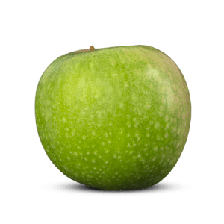

In [28]:
# Load singel image
img = tf.keras.preprocessing.image.load_img(
    "../data/80apples/naamloze map/1832065205.jpg", target_size=img_size)
img

In [ ]:

features = Features({
    'label': ClassLabel(names=['Normal', 'Blotch', 'Scrab', 'Rot']),
    'img': Image(decode=True, id=None),
    'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)), })

In [29]:
resize = tf.image.resize(img, (224,224))

ValueError: Attempt to convert a value (<PIL.Image.Image image mode=RGB size=224x224 at 0x7FDFF220CA00>) with an unsupported type (<class 'PIL.Image.Image'>) to a Tensor.

In [ ]:
img = np.array(img)/255.0
img = np.reshape(img, (224,224,3))
img.shape

In [ ]:
img[np.newaxis, :]

In [ ]:
result = classifier.predict(img[np.newaxis, :])
result.shape

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

In [ ]:
labels = ['rot','normal', 'scab','blotch']
# labels = pickle.load(open('saved_models/tl_mobileNetV2/model/pi_22112022_12h10_1.pkl', 'rb'))
# labels =  test_func(pickled_model)
# print(labels)

In [ ]:
# pickled_model.predict(img)

In [ ]:
predictions = model.predict_on_batch(imgReshape).flatten()

predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)
# predictions = list(predictions)

predictions = predictions.tolist()


print('Predictions:\n', predictions.numpy())
print('Labels:\n', labels)


In [ ]:
labels[predicted_label_index]

In [ ]:
# img_array = keras.preprocessing.image.img_to_array(img)
# # img_array = tf.expand_dims(img_array, 0) # Create a batch
# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#    "This image likely belongs to {} with {:.2f} percent confidence."
#    .format(labels[np.argmax(score)], 100 * np.max(score))
# )